In [280]:
# Import pandas library
import pandas as pd
import numpy as np

# Read the online file by the URL provides above, and assign it to variable "df"
other_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(other_path, header=None)

# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


<h1> Replacing Missing Values with the Mean</h1>
we need to replace the "?" symbol with NaN. dropna() can remove the missing values 


In [281]:
df.replace('?',np.NaN, inplace=True) #hace el cambio en el mismo dataframe
# df1=df.dropna(subset=["price"], axis=0) #para eliminar toda la fila con valor NaN en price

mean = df["price"].astype(float).mean() #calcula la media
print("media es: %.2f" % mean)
df["price"] = df1["price"].replace(np.nan,mean)
df[["symboling","normalized-losses","price"]].head(10)

media es: 13207.13


,symboling,normalized-losses,price
0,3,NaN,13495
1,3,NaN,16500
2,1,NaN,16500
3,2,164,13950
4,2,164,17450
5,2,NaN,15250
6,1,158,17710
7,1,NaN,18920
8,1,158,23875
9,0,NaN,13207


# Data Formatting

In [282]:
print (df.dtypes)
df["price"] = df["price"].astype("int") #convierte a float el tipo porque antes era Object en price
print("\nTipos arreglado")
print (df.dtypes) #muestra los tipos de cada columna
print()
print(df[["symboling","normalized-losses","price"]].head(10))

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

Tipos arreglado
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels

<h1>Binning</h1>

In [303]:
bins = np.linspace(min(df["price"]),max(df["price"]),4) #retorna un rango distribuido equitativamente. En este caso 4 valores de min a max
group_names = ["Low","Medium", "High"]
df["price_binned"] = pd.cut(df["price"],bins,labels=group_names,include_lowest=True )
print(df[["symboling","normalized-losses","price","price_binned"]].head(10)) #pasa de valores numeros a categorias
print()
print(df["price_binned"].value_counts())

   symboling normalized-losses  price price_binned
0          3               NaN  13495          Low
1          3               NaN  16500          Low
2          1               NaN  16500          Low
3          2               164  13950          Low
4          2               164  17450          Low
5          2               NaN  15250          Low
6          1               158  17710          Low
7          1               NaN  18920       Medium
8          1               158  23875       Medium
9          0               NaN  13207          Low

Low       175
Medium     18
High       12
Name: price_binned, dtype: int64


<h1>Graficando Price</h1>

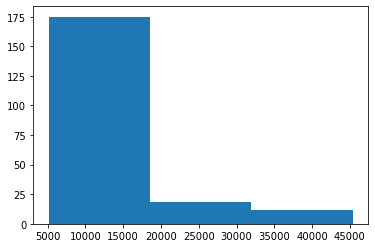

In [302]:
import matplotlib.pyplot as plt
xHistograma = df["price"]
plt.hist(xHistograma, bins) #grafica el histograma con los valores categorizados con los bins calculados
plt.show()

<h1>Turning categorical variables into quantitative variables</h1>

In [295]:
#print (df.head(10))
categorizacion = pd.get_dummies(df["fuel-type"]) #pasa un valor numerico a categorías
categorizacion["fuel"] = df["fuel-type"]
print(categorizacion)

     diesel  gas    fuel
0         0    1     gas
1         0    1     gas
2         0    1     gas
3         0    1     gas
4         0    1     gas
..      ...  ...     ...
200       0    1     gas
201       0    1     gas
202       0    1     gas
203       1    0  diesel
204       0    1     gas

[205 rows x 3 columns]
